# 
## 신경망의 예
- 신경망 그림에서 가장 왼쪽 줄을 입력층, 맨 오른쪽 줄을 출력층, 중간줄을 은닉층이라 부름
- 은닉층의 뉴런은 사람의 눈에 보이지 않음

## 퍼셉트론 복습
<!-- - y =  \begin{cases}
n/2, & \text{if }n\text{ is even} \\
3n+1, & \text{if }n\text{ is odd}
\end{cases} -->
- y = 0 (b + w1x1+ w2x2 =< 0)
- y = 1 (b + w1x1 +w2x2 => 0)
- 여기서 b는 편향을 의미함, 편향의 입력신호는 항상 1임
- 위의 식을 더 간결하게 표현하면
    - $$ y = h(b + w_{1}x_{1} + w_{2}x_{2})
    - h(x) = 0 (x =< 0), h(x) = 1 (x => 0) 

## 활성화 함수 (activation function) h(x)의 등장
- 입력신호의 총합을 출력 신호로 변환하는 함수
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할을 함
- 위의 식을 다시 표현하면 아래와 같음
    - $$ a = b + w_{1}x_{1} + w_{2}x_{2} $$
    - $$ y = h(a) $$
- 이 책에서 뉴련과 노드는 용어는 같은 의미

# 활성화 함수
- 활성화 함수는 임계값을 경계로 출력이 바뀌는데 이러한 함수를 계단 함수(step function)라 부름
- 퍼셉트론에서는 활성화 함수로 계단 함수를 이용함

## 시그모이드 함수 (sigmoid function)
-  $$ h(x) = \frac{1}{1 + exp(-x)} $$
- 위의 식에서 exp(-x)는 e^-x 를 의미하면 e는 자연상수 2.7182....의 값을 갖는다
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
- 퍼셉트론과 신경망의 주된 차이는 이 활성화 함수

## 계단 함수 구현하기

In [2]:
import numpy as np

In [3]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

- 이 구현은 단순하고 쉽지만, 인수 x는  실수(부동소수점)만 받아들임
- 즉, step_function(3.0)은 되지만 넘파이 배열을 인구로 넣을 수는 없음 가령 step_function(np.array([1.0, 2.0]))은 안됨

In [4]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [5]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


- 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성됨
- 여기서 y는 bool 배열임 , 우리가 원하는 계단 함수는 0이나 1의 int형을 출력하는 함수임

In [6]:
y = y.astype(np.int64)
print(y)

[0 1 1]


- 이처럼 넘파이 배열의 자료형을 변환할 때는 astype() 메서드를 사용

## 계단 함수의 그래프

In [7]:
from matplotlib import pyplot as plt

In [8]:
def step_function(x):
    return np.array(x > 0, dtype=np.int64)

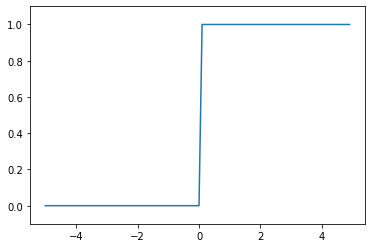

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 시그모이드 함수 구현하기

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


- 위의 함수가 넘파이 배열도 처리해줄 수 있는 비밀은 넘파이의 브로드캐스트
- 브로드캐스트 기능이란 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행하는 것

In [19]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


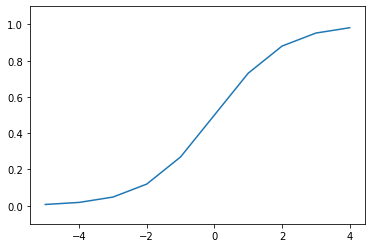

In [20]:
x = np.arange(-5.0, 5.0, 1.0)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 값 범위 지정
plt.show()

## 시그모이드 함수와 계단 함수 비교
- 차이점
    - 두 함수의 그래프를 보고 가장 먼저 느껴지는 차이점은 매끄럼움의 차이
    - 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화함
    - 계단 함수는 0을 경계로 출력이 값자기 변화함
    - 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 됨
    - 계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려줌
    - 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면 신경망에서는 연속적은 실수가 흐름
- 공통점
    - 시그모이드 함수와 계단 함수 둘 다 입력이 작을 때는 0에 가깝게 입력이 커지면 1에 가까운 값이 출력됨
    - 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력
    - 입력이 아무리 크거나 작어도 출력은 0과 1 사이
    - 둘 모두 비선형 함수

## 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 함
- 선형함수를 사용하지 않는 이유는 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
- 선형 함수의 문제는 층을 아무리 깊게 해도 "은닉층이 없는 네트워크"로도 똑같은 기능을 할 수 있다는 것
- 예를 들어 선형 함수인 h(x) = cx를 활성화 함수로 이용한 3층 네트워크의 경우 y(x) = h(h(h(x))) 의 식으로 나타낼 수 있음
- 이는 y(x) = c * c * c * x 처럼 곱셈을 세번 수행하지만 실은 y(x) = ax 와 같은 식 (a = c^3)
- 즉, 은닉층이 없는 네트워크로 표현할 수 있음 그러므로 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없음 

## ReLU 함수
- 최근에는 ReLU(Rectified Linear Unit)함수를 주로 이용
- ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수

In [21]:
def relu(x):
    return np.maximum(0, x)